In [1]:
from sklearn import datasets  #imports the datasets module from the sklearn
faces = datasets.fetch_olivetti_faces() #calls the fetch_olivetti_faces() function from the datasets module. This function downloads the Olivetti faces dataset if it's not already downloaded and loads it into the faces variable. The faces variable now contains the dataset, including both the images of faces and their corresponding features.  
faces.data.shape   #faces.data attribute contains the feature matrix of the Olivetti faces dataset.

#first element of the tuple represents the number of samples (i.e., the number of face images in the dataset), 
#and the second element represents the number of features (i.e., the number of pixels in each face image).

#(400, 4096), it means there are 400 face images in the dataset, and each image is represented as a 1D array of 4096 pixels 
#(assuming the images are 64x64 pixels and flattened into 1D arrays).

(400, 4096)

In [2]:
##single image shape
k=faces.images[1]   #fetches the second face image from the dataset
k.shape

(64, 64)

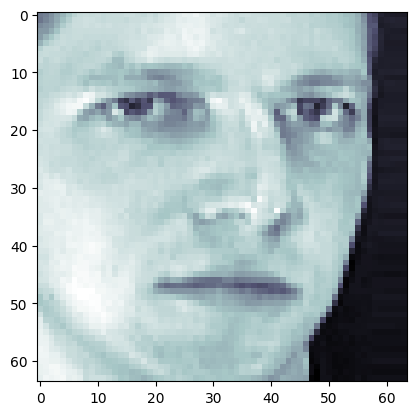

In [3]:
##Plot the image
from matplotlib import pyplot as plt
plt.imshow(k,cmap=plt.cm.bone)   

#cmap=plt.cm.bone specifies the colormap to be used for mapping the pixel values to colors. In this case, 
#plt.cm.bone is a grayscale colormap in Matplotlib, where lower values are displayed as darker shades and 
#higher values as lighter shades

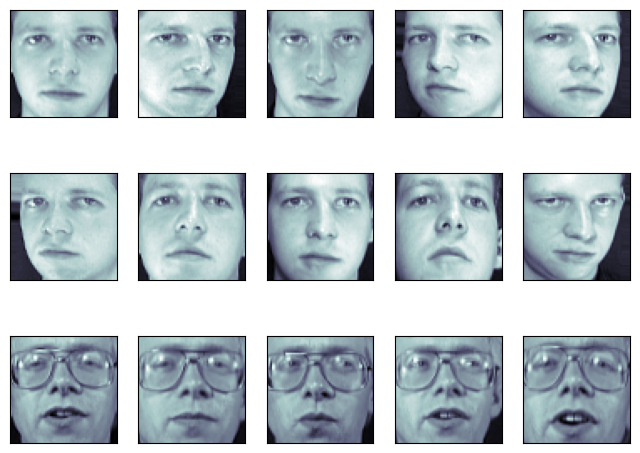

In [4]:
fig = plt.figure(figsize=(8, 6))   #define figure size
# plot several images, plots a grid of 15 images from the faces.images
for i in range(15):                  #loop iterates 15 times, creating a grid of 3 rows and 5 columns to display 15 images
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])   #i + 1) specifies the position of the current subplot in the grid. i is the loop variable, starting from 0, so i + 1 ensures that the positions start from 1. 
    ax.imshow(faces.images[i], cmap=plt.cm.bone)    #displays the i-th image from faces.images using a grayscale colormap

In [5]:
#PCA (Principal Component Analysis) is being applied to the faces.data

from sklearn.decomposition import PCA   #PCA is a technique used for dimensionality reduction and feature extraction.
pca = PCA(300)        #PCA should reduce the dimensionality of the data to 300 principal components. means the data will be transformed into a new space where each sample is represented by only 300 features (principal components)
pca.fit(faces.data)



PCA(n_components=300)

 Fitting the PCA model means finding the principal components of the dataset. After this line is executed, the PCA model will be trained on the data, and you can use it to transform data into its principal components or to project new data points into the reduced-dimensional space defined by these components.
 
After fitting the PCA model, you can access important attributes such as,
1. pca.components_ (principal axes in feature space, representing the directions of maximum variance),
2. pca.explained_variance_ (the amount of variance explained by each of the selected components), and 
3. pca.transform() (to transform the data into the reduced-dimensional space).

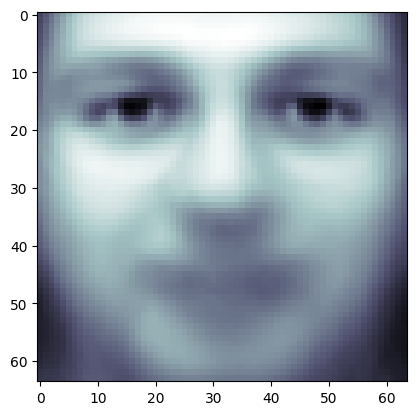

In [6]:
##average
plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone) ##convert the img into (64,64)

pca.mean_: This attribute of the PCA object represents the mean of the input data. When PCA is applied, the mean of the data is subtracted from each data point to center the data. This mean is represented as a 1D array.

pca.mean_.reshape(faces.images[0].shape): The reshape() function is used to reshape the 1D mean array back into a 2D array that matches the shape of the original images in the dataset. "faces.images[0].shape" gives the shape of one of the original images (64x64).

plt.imshow(): Finally, the reshaped mean image is displayed using Matplotlib's imshow() function.

In [7]:
print(pca.components_.shape)  ## tuple representing the shape of the pca.components_ array

# first element of the tuple indicates the number of principal components (or features) retained after PCA, 
#second element represents the original number of features in the dataset.

(300, 4096)


[1.88401508e+01 1.10717525e+01 6.30461693e+00 3.95458031e+00
 2.85604215e+00 2.49770689e+00 1.92006290e+00 1.61115861e+00
 1.54922283e+00 1.32295001e+00 1.26210976e+00 1.13691092e+00
 9.86397982e-01 9.07590389e-01 8.40928912e-01 7.73553967e-01
 7.27143049e-01 6.45265937e-01 5.96450686e-01 5.90999901e-01
 5.52701414e-01 4.86281902e-01 4.61992234e-01 4.50753093e-01
 4.32135701e-01 4.20793474e-01 4.06521380e-01 3.92300278e-01
 3.62094849e-01 3.49055469e-01 3.18055868e-01 3.03963602e-01
 2.86368549e-01 2.64683366e-01 2.53478974e-01 2.50045478e-01
 2.41426572e-01 2.36274034e-01 2.23224401e-01 2.16788545e-01
 2.05526546e-01 2.00952247e-01 1.93480894e-01 1.89756557e-01
 1.82676077e-01 1.79138511e-01 1.75868705e-01 1.74410269e-01
 1.65294185e-01 1.62178665e-01 1.55738398e-01 1.51460528e-01
 1.46404937e-01 1.41573131e-01 1.40520215e-01 1.36465028e-01
 1.33381277e-01 1.29886746e-01 1.28080651e-01 1.25318438e-01
 1.22971870e-01 1.20443769e-01 1.18643425e-01 1.16867088e-01
 1.12829439e-01 1.112380

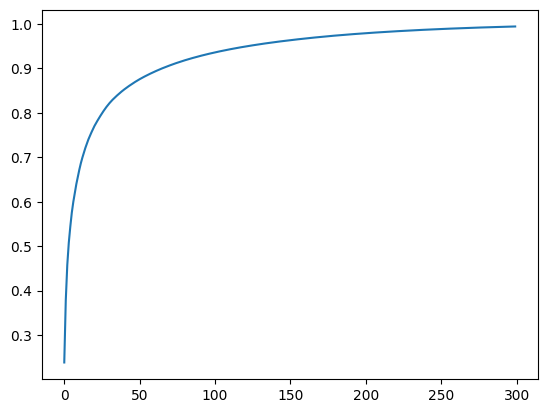

In [8]:
import numpy as np
print(pca.explained_variance_)  ##Eigen.values associated with each of the principal components

#Eigenvalues represent the amount of variance explained by each principal component. 

plt.plot(np.cumsum(pca.explained_variance_ratio_)) #creating a cumulative explained variance plot. 

#x-axis represents the number of principal components, and the y-axis represents the cumulative explained variance.

plt.show()

This plot is essential in understanding how much of the total variance in the dataset is retained as you increase the number of principal components. In an ideal scenario, you want to retain a significant portion of the variance (usually around 95-99%) while reducing the dimensionality of the dataset.

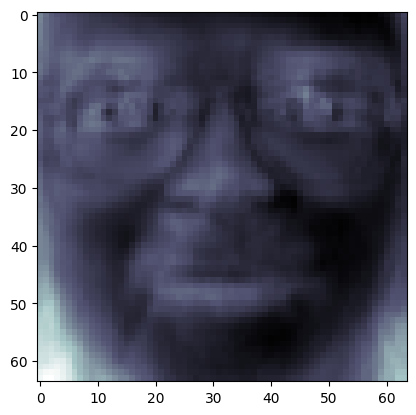

In [9]:
##plot the first eigen face, visualizes the pattern captured by the first principal component of the PCA.
plt.imshow(pca.components_[0].reshape(faces.images[0].shape),cmap=plt.cm.bone)

pca.components_ is a 2D array where each row represents a principal component. By accessing the first row (pca.components_[0]), you are retrieving the coefficients of the first principal component

first principal component, represented as a 1D array, is reshaped into a 2D array that matches the shape of the original images

faces.images[0].shape gives the shape of one of the original images (64x64). Reshaping the 1D array into a 2D array allows you to visualize it as an image.

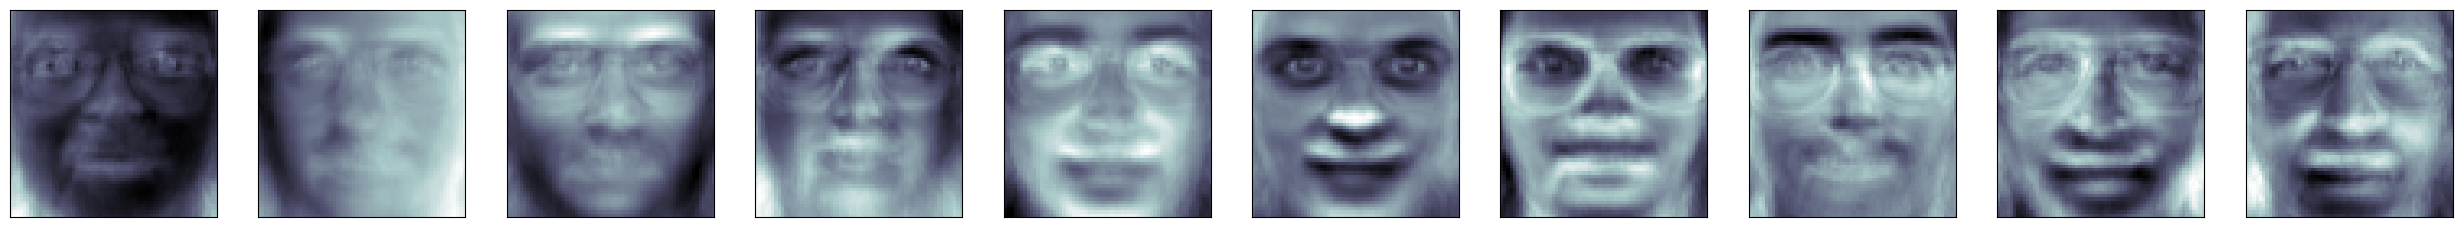

In [10]:
##plot first 10 eigen face
fig = plt.figure(figsize=(320, 120))
for i in range(10):    #loop will create subplots for the first 10 eigenfaces.
    ax = fig.add_subplot(3, 100, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

In [11]:
##eigen space  ##omega
#applies the previously trained PCA model to transform the original data from the Olivetti faces dataset (faces.data)
#into the reduced-dimensional space represented by the principal components

faces_pca = pca.fit_transform(faces.data)
print(faces_pca.shape)

#shape will be (n_samples, n_components), where n_samples is the number of face images and n_components is the number 
#of principal components (in this case, 300).

(400, 300)


In [12]:
#performs an inverse transformation using the PCA model.

faces_proj = pca.inverse_transform(faces_pca) # transformed data and projects it back into the original high-dimensional space
print(faces_proj.shape)

(400, 4096)


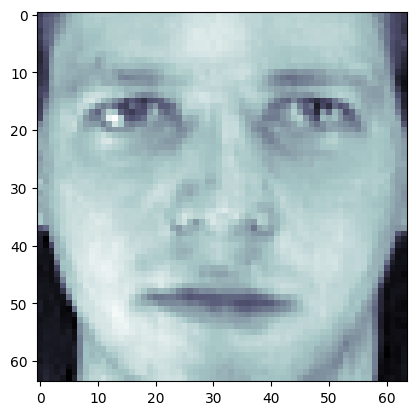

In [13]:
# visualizes the first image in the faces_proj array after it has been inverse-transformed

plt.imshow(faces_proj[0].reshape(faces.images[0].shape),cmap=plt.cm.bone) #retrieve 1st image and reshape to 64*64(1D to 2D) and show

In [ ]:
##assignment
#do the same thing for mnist data set

In [33]:
##How to import data set
import cv2  # library for image processing and computer vision algorithms
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import decomposition #decomposition module from scikit-learn, which includes implementations of various matrix factorization techniques, including Principal Component Analysis (PCA).
from sklearn.decomposition import PCA
import glob    #glob module, which provides a function for finding files and directories whose names match a specified pattern. It's often used for file handling and manipulation.
from numpy import asarray  #used to convert input data (like lists, tuples, etc.) into NumPy arrays.
from PIL import Image  #imports the Image module from the Python Imaging Library (PIL), which is used for opening, manipulating, and saving many different image file formats.

In [34]:
#captures images from the default camera (usually the webcam) and saves them as JPEG files


cap = cv2.VideoCapture(0) # initializes the video capture object (cap) using the default camera (camera index 0). You can change the index if you have multiple cameras connected.
count = 0 #keep track of the number of captured images.
while True:   #infinite loop, which captures frames from the camera until the loop is manually broken

    ret, frame = cap.read()   #captures a frame from the video capture object (cap). ret is a boolean variable indicating whether the frame was successfully read, and frame contains the captured image.
    count += 1
    face = cv2.resize(frame, (200,400)) #count is incremented, and the captured frame is resized to dimensions 200x400 pixels (width x height) 

    file_name_path = 'D:/New folder/2023-24/foml_prac10_img/' + str(count) + '.jpg'   #constructs a file path for the image and saves the resized frame (face) as a JPEG file in the specified directory.
    cv2.imwrite(file_name_path, face)   

    cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)  #adds text to the face image
    cv2.imshow('Face Cropper', face)   ##displays the captured and processed frame with the window title "Face Cropper."
        
    if cv2.waitKey(1) == 13 or count == 20: #13 is the Enter Key
        break

#cv2.waitKey(1) function waits for a key event for 1 millisecond. If the Enter key (key code 13) is pressed 
#or if 20 images have been captured (whichever occurs first), the loop is terminated.
        
cap.release()  #video capture object is released
cv2.destroyAllWindows()       #all OpenCV windows are closed.
print("Collecting Samples Complete")   #message is printed

In [29]:
img = 'D:/New folder/2023-24/foml_prac10_img'

In [30]:
# function that takes a directory path as input, reads grayscale images from that directory, and returns them as a NumPy array.
# for further processing, such as image analysis or machine learning tasks.

import os #way to interact with the operating system to read file 
def get_image_array(path):   #function take path argument
    image_list = os.listdir(path)  #lists all the files in the specified directory and store file names in var
    images = []   #empty list to store the loaded images.
    for img in image_list:      # iterates through the list of file names in image_list.
        img = cv2.imread(path + '/' + img,0)  #Inside the loop, it reads each image using OpenCV's imread function. The images are loaded in grayscale (0 argument indicates grayscale mode).
        images.append(img) #Adds the loaded image to the images list.
    return np.array(images)  #Finally, the function converts the list of images into a NumPy array and returns it.

In [31]:
img1 = get_image_array(img)    # 20 images loaded in img1
img1.shape   #(num_images, height, width)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:/New folder/2023-24/foml_prac10_img'

IndexError: index 0 is out of bounds for axis 0 with size 0

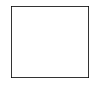

In [32]:
fig = plt.figure(figsize=(8, 6))
for i in range(20):
    ax = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    ax.imshow(img1[i], cmap=plt.cm.bone)

In [91]:
img1= img1/255.0
img1= img1.reshape(20, img1.shape[1]*img1.shape[2])
img1.shape

(20, 80000)

In [ ]:
Y=[1,1,1,1,1,1,1,1,1,0,0,0,0,0,0]